In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_hub as hub
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import normalize

In [2]:
#load model from tfhub.dev
model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [3]:
def embed(sentences):
    return model(sentences)

In [4]:
def preprocess_data(df):
    # Lowercase the 'shortdesc' column
    df['shortdesc'] = df['shortdesc'].str.lower()
    return df

In [5]:
df = pd.read_csv('data_recom.csv')
df = df[["prompt", "shortdesc"]]
df = preprocess_data(df)

In [6]:
desc = list(df['shortdesc'])
embeddings = embed(desc)

In [7]:
normalized_embeddings = normalize(embeddings)

In [8]:
pca = PCA(n_components=2)
emb_2d = pca.fit_transform(normalized_embeddings)

In [9]:
nn = NearestNeighbors(n_neighbors=5, metric='euclidean')
nn.fit(normalized_embeddings)

NearestNeighbors(metric='euclidean')

In [10]:
# Save embeddings to TSV file
np.savetxt('embeddings.tsv', normalized_embeddings, delimiter='\t')
# Save metadata to TSV file
df[['prompt']].to_csv('metadata.tsv', index=False, header=False, sep='\t')

In [11]:
def recommend(text):
    emb = embed([text])
    normalized_emb = normalize(emb)
    neighbors = nn.kneighbors(normalized_emb, return_distance=False)[0]
    return df['prompt'].iloc[neighbors].tolist()

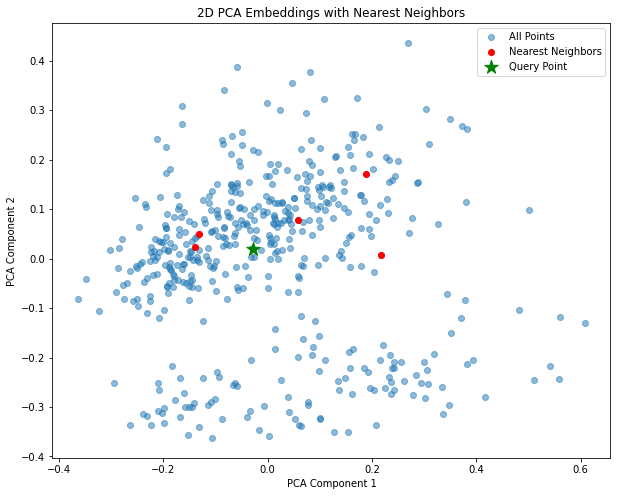

In [15]:
# Function to recommend and plot nearest neighbors
def recommend_and_plot(text):
    emb = embed([text])
    normalized_emb = normalize(emb)
    neighbors = nn.kneighbors(normalized_emb, return_distance=False)[0]
    
    # Scatter plot
    plt.figure(figsize=(10, 8))
    plt.scatter(emb_2d[:, 0], emb_2d[:, 1], alpha=0.5, label='All Points')
    plt.scatter(emb_2d[neighbors, 0], emb_2d[neighbors, 1], color='red', label='Nearest Neighbors')
    
    # Highlight the query point
    plt.scatter(normalized_emb[0, 0], normalized_emb[0, 1], color='green', marker='*', s=200, label='Query Point')
    
    # Add labels and legend
    plt.title("2D PCA Embeddings with Nearest Neighbors")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    
    # Show the plot
    plt.show()

# Example usage
recommend_and_plot("modifikasi motor")


In [14]:
print('Recommended prompts:')
recommended_prompts = recommend("modifikasi motor")
print(recommended_prompts)

Recommended prompts:
['cara memperbaiki motor sendiri', 'cara memeriksa dan mengganti filter udara mobil', 'cara memilih velg mobil yang sesuai', 'cara memilih knalpot mobil yang berkualitas', 'cara menggunakan Git dan GitHub untuk kolaborasi kode']
